<h2> Index Generation Approach: </h2>

| Advisor | Advisee |                                  
| --- | --- |
|Jose, Joseph | Thoppil, John E. |
|Raju, K. V. | Ancy, V P.|
|Francis, M. S.|Murali, Soumya
|Francis, M. S.|Rashmi, T R.
|Raju, Kv|Thadevoose, K.G.|

<h3> Index generated with Exact Match Algorithm : </h3>

|names | index|
| --- | --- |
|Jose, Joseph|1|
|Thoppil, John E.|2|
|Raju, K. V.|3|
|Ancy, V P.|4|
|Francis, M. S.|5|
|Murali, Soumya|6|
|Rashmi, T R.|7|
|Raju, Kv|8|
|Thadevoose, K.G.|9|

<h3>After Running Disambiguation Algorithm</h3>
<p>Pairs Identified as same :<code>(Raju, K. V. , Raju, Kv)</code></p></br>
<p>Now Modified index would be :</p>

|names | index|
| --- | --- |
|Jose, Joseph|1|
|Thoppil, John E.|2|
|Raju, K. V.|3|
|Ancy, V P.|4|
|Francis, M. S.|5|
|Murali, Soumya|6|
|Rashmi, T R.|7|
|Raju, Kv|3|
|Thadevoose, K.G.|9|

| advisorId | researcherId | advId_1|studId_1|                                
| --- | --- | --- | --- |
|1|2|1|2|
|3|4|3|4|
|5|6|5|6|
|5|7|5|7|
|8|9|3|9|

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from collections import Counter

In [3]:
%matplotlib inline

In [4]:
ment = pd.read_csv('Shodhganga_mentorship.csv', sep = ",")

In [5]:
ment.head()

,advisorId,researcherId,advId_1,studId_1,advisor_name,researcher_name,dc.date.submitted[],dc.language.iso[],dc.publisher.department[],DepartmentId,dc.publisher.institution[],instituteId,dc.title[],thesisId,dc.type.degree,dc.date.awarded,dc.subject.ddc,dc.source.uri,dc.description.abstract,dc.title.alternative
0,0,38335,0,38335,"Jose, Joseph","Thoppil, John E.",01-01-1998,eng,department of sacred heart college(thevara). d...,D1321,Mahatma Gandhi University,I251,Chromosome studies and exploration of chemical...,T121508,phd,16-12-1993,500::Natural sciences & mathematics|580::Plant...,http://shodhganga.inflibnet.ac.in/,NaN,NaN
1,1,75893,1,75893,"Raju, K. V.","Ancy, V P.",29-05-2015,eng,department of sacred heart college,D2490,Mahatma Gandhi University,I251,Fishing industry in Kerala The perils of inter...,T64215,phd,29-03-2016,300::Social sciences,http://shodhganga.inflibnet.ac.in/,NaN,NaN
2,2,75894,2,75894,"Joseph, K. K.","Sajoy, P B.",24-08-2015,eng,department of sacred heart college,D2490,Mahatma Gandhi University,I251,Savings and investment pattern of stock invest...,T134025,phd,29-03-2016,300::Social sciences,http://shodhganga.inflibnet.ac.in/,NaN,NaN
3,3,75895,3,75895,"Thomas, E. M.","Leema, T G.",15-07-2015,eng,department of sacred heart college,D2490,Mahatma Gandhi University,I251,An economic analysis of Kole cultivation in Ke...,T78956,phd,02-06-2016,300::Social sciences,http://shodhganga.inflibnet.ac.in/,NaN,NaN
4,4,75896,4,75896,"Francis, M. S.","Murali, Soumya",28-12-2015,eng,department of sacred heart college,D2490,Mahatma Gandhi University,I251,Phytochemical and Molecular Systematics of Ari...,T54905,phd,05-11-2016,300::Social sciences,http://shodhganga.inflibnet.ac.in/,NaN,NaN


In [6]:
ment.columns

Index(['advisorId', 'researcherId', 'advId_1', 'studId_1', 'advisor_name',
       'researcher_name', 'dc.date.submitted[]', 'dc.language.iso[]',
       'dc.publisher.department[]', 'DepartmentId',
       'dc.publisher.institution[]', 'instituteId', 'dc.title[]', 'thesisId',
       'dc.type.degree', 'dc.date.awarded', 'dc.subject.ddc', 'dc.source.uri',
       'dc.description.abstract', 'dc.title.alternative'],
      dtype='object')

<h3>Initial Index generated based on string matching algorithm,
i.e if names are exact similar (name1==name2), index them with same id </h3>

In [7]:
graph = nx.convert_matrix.from_pandas_edgelist(ment, 'advisorId','researcherId', create_using=nx.DiGraph())

In [8]:
len(graph.nodes())

238442

<h3> Initial index is modified with Disambiguated names pairs</h3>

In [9]:
graph1 = nx.convert_matrix.from_pandas_edgelist(ment, 'advId_1','studId_1', create_using=nx.DiGraph())

In [10]:
len(graph1.nodes())

227489

In [11]:
components = list(nx.weakly_connected_components(graph))

In [12]:
components1 = list(nx.weakly_connected_components(graph1))

In [13]:
components.sort(key=len, reverse=True)

In [14]:
components1.sort(key=len, reverse=True)

In [15]:
len(components)

46370

In [16]:
len(components[0])

92530

In [17]:
len(components1)

38001

In [18]:
len(components1[0])

105422

In [41]:
#components1[-5:] 
#components with size 1, which is exceptional, because of edges the component size be atleast 2. 

[{67798}, {68902}, {69866}, {71835}, {73157}]

In [19]:
comp_len=[len(c) for c in components1]

In [20]:
comp_size_dist=Counter(comp_len)

In [21]:
comp_size_dist

Counter({105422: 1,
         204: 1,
         131: 1,
         130: 1,
         88: 1,
         74: 1,
         73: 1,
         71: 1,
         70: 1,
         65: 1,
         64: 1,
         62: 1,
         60: 2,
         58: 1,
         57: 1,
         55: 1,
         53: 1,
         51: 1,
         49: 2,
         47: 1,
         46: 2,
         45: 4,
         44: 3,
         42: 1,
         41: 3,
         40: 2,
         39: 1,
         38: 2,
         37: 4,
         36: 4,
         35: 7,
         34: 6,
         33: 7,
         32: 6,
         31: 5,
         30: 2,
         29: 9,
         28: 8,
         27: 13,
         26: 9,
         25: 18,
         24: 10,
         23: 15,
         22: 18,
         21: 18,
         20: 29,
         19: 36,
         18: 41,
         17: 45,
         16: 60,
         15: 79,
         14: 91,
         13: 110,
         12: 124,
         11: 149,
         10: 238,
         9: 327,
         8: 429,
         7: 665,
         6: 949,
        

In [22]:
in_dgr = graph1.in_degree()

In [23]:
in_dgr = dict(in_dgr)

In [24]:
sorted_in_dgr = dict(sorted(in_dgr.items(), key=lambda item: item[1],reverse=True))

In [27]:
sorted_in_dgr

{1788: 88,
 2216: 82,
 921: 78,
 1262: 78,
 1313: 72,
 93: 65,
 23507: 63,
 7143: 62,
 814: 57,
 1260: 57,
 6657: 54,
 7659: 54,
 1232: 53,
 1490: 53,
 5855: 47,
 359: 45,
 15637: 43,
 8212: 43,
 19789: 41,
 21542: 40,
 49059: 39,
 1697: 38,
 48542: 38,
 2214: 37,
 26010: 36,
 52847: 35,
 23279: 31,
 2374: 31,
 21460: 31,
 30003: 30,
 8558: 30,
 40246: 29,
 3228: 29,
 68002: 28,
 8597: 28,
 1688: 28,
 40505: 28,
 79553: 27,
 1725: 26,
 2447: 26,
 11041: 26,
 8446: 26,
 23926: 25,
 8914: 25,
 99813: 25,
 8561: 24,
 5697: 24,
 57950: 23,
 44045: 23,
 6664: 23,
 104851: 23,
 7541: 22,
 78033: 22,
 3863: 22,
 22978: 22,
 1503: 22,
 79274: 22,
 6779: 22,
 7251: 22,
 77105: 21,
 78101: 21,
 7835: 21,
 26516: 21,
 39960: 21,
 22916: 21,
 21400: 21,
 34460: 21,
 24606: 20,
 1222: 20,
 78011: 20,
 60241: 20,
 47854: 20,
 78937: 20,
 37543: 20,
 69132: 20,
 8863: 20,
 11127: 20,
 39945: 20,
 155516: 20,
 82: 19,
 781: 19,
 1153: 19,
 8620: 19,
 5733: 19,
 8651: 19,
 1556: 19,
 51470: 19,
 34697:

In [24]:
in_dgr_val = in_dgr.values()

In [25]:
in_dgr_dist = Counter(in_dgr_val)

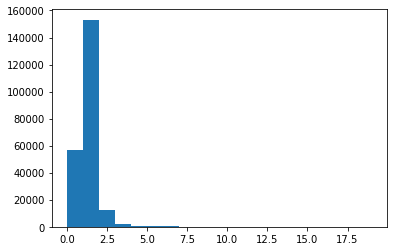

In [26]:
plt.hist(in_dgr_val, bins=np.arange(0,20,1))
plt.show()

In [27]:
in_dgr_dist #indgree, no.nodes

Counter({1: 153156,
         0: 57149,
         2: 12757,
         4: 851,
         3: 2207,
         5: 427,
         12: 31,
         19: 13,
         8: 107,
         6: 250,
         30: 2,
         65: 1,
         57: 2,
         13: 27,
         7: 164,
         17: 19,
         36: 1,
         10: 72,
         11: 33,
         45: 1,
         16: 12,
         78: 2,
         53: 2,
         9: 82,
         15: 19,
         28: 4,
         38: 2,
         21: 8,
         23: 4,
         25: 3,
         18: 12,
         20: 12,
         72: 1,
         22: 8,
         31: 3,
         43: 2,
         14: 22,
         62: 1,
         63: 1,
         29: 2,
         37: 1,
         47: 1,
         88: 1,
         41: 1,
         82: 1,
         26: 4,
         54: 2,
         27: 1,
         24: 2,
         40: 1,
         39: 1,
         35: 1})

In [43]:
#list(sorted_in_dgr.keys())[-5:]

In [35]:
#list(sorted_in_dgr.values())[-1000:]

In [53]:
#ment[ment['advId_1']==75844]

In [37]:
out_dgr = graph1.out_degree()

In [29]:
out_dgr = dict(out_dgr)

In [30]:
sorted_out_dgr = dict(sorted(out_dgr.items(), key=lambda item: item[1],reverse=True))

In [38]:
sorted_out_dgr #node degree

{393: 172,
 1240: 100,
 2422: 88,
 2854: 83,
 3948: 83,
 557: 78,
 1775: 73,
 1156: 71,
 6108: 70,
 8254: 70,
 71609: 67,
 2793: 66,
 1262: 65,
 3770: 64,
 370: 63,
 8561: 63,
 2319: 62,
 1708: 61,
 7566: 61,
 20913: 60,
 17100: 59,
 24250: 59,
 2423: 58,
 13802: 58,
 14906: 58,
 12741: 56,
 2349: 56,
 14225: 56,
 14131: 55,
 6776: 54,
 10264: 54,
 3441: 53,
 21471: 53,
 1333: 51,
 25284: 51,
 6768: 50,
 3135: 50,
 15072: 50,
 28998: 50,
 2750: 49,
 42281: 49,
 25305: 49,
 4200: 48,
 15493: 48,
 13191: 47,
 42365: 47,
 30796: 47,
 7474: 46,
 814: 45,
 1697: 45,
 54262: 45,
 1331: 44,
 2351: 44,
 26713: 44,
 52333: 44,
 2216: 43,
 1688: 43,
 2548: 43,
 7347: 43,
 42128: 43,
 64721: 43,
 71624: 43,
 4809: 42,
 12778: 42,
 36687: 42,
 47146: 42,
 65860: 41,
 612: 40,
 2760: 40,
 11076: 40,
 17685: 40,
 19475: 40,
 21593: 40,
 26712: 40,
 65049: 40,
 40039: 39,
 3311: 39,
 4159: 39,
 8523: 39,
 8569: 39,
 10519: 39,
 50397: 39,
 65870: 39,
 1027: 38,
 6732: 38,
 6712: 38,
 5738: 38,
 11169

In [32]:
out_dgr_val = out_dgr.values()

In [33]:
out_dgr_dist = Counter(out_dgr_val)

In [34]:
deg, cnt = zip(*out_dgr_dist.items())

In [37]:
#out_dgr_dist

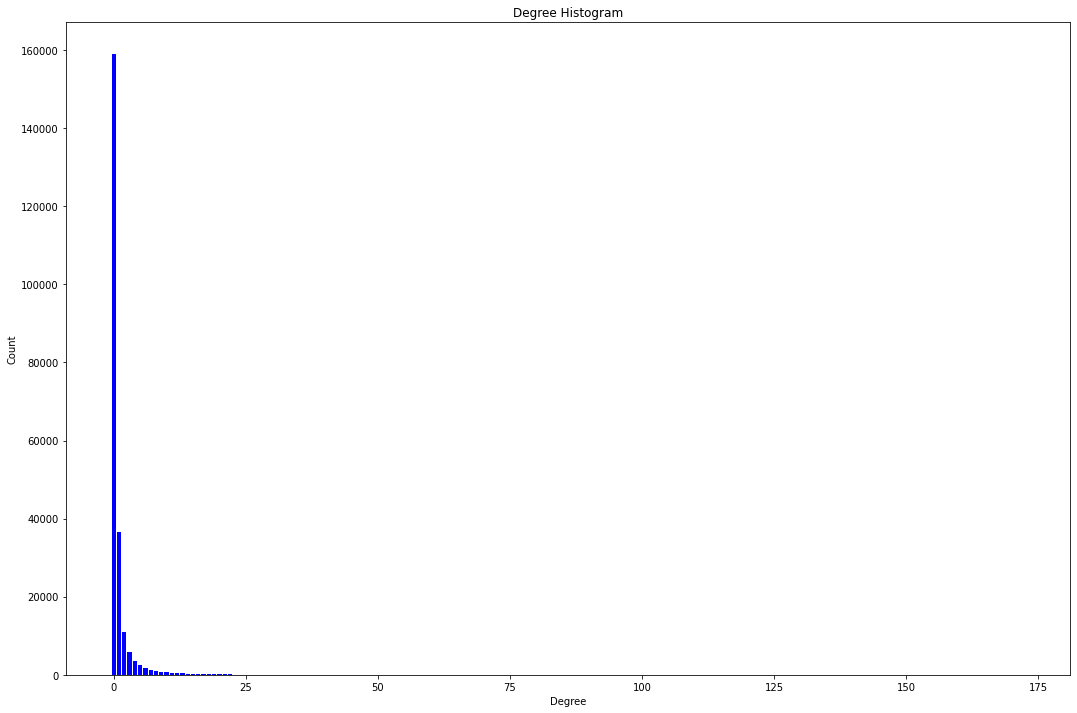

In [35]:
fig, ax = plt.subplots(figsize=(18,12))
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d for d in deg])
#ax.set_xticklabels(deg)
plt.show()

<h2>ANCESTORS, DESCENDANTS</h2>

In [12]:
len(nx.descendants(graph1,393))

5675

In [13]:
len(nx.ancestors(graph1,393))

183

In [39]:
ment.columns

Index(['advisorId', 'researcherId', 'advId_1', 'studId_1', 'advisor_name',
       'researcher_name', 'dc.date.submitted[]', 'dc.language.iso[]',
       'dc.publisher.department[]', 'DepartmentId',
       'dc.publisher.institution[]', 'instituteId', 'dc.title[]', 'thesisId',
       'dc.type.degree', 'dc.date.awarded', 'dc.subject.ddc', 'dc.source.uri',
       'dc.description.abstract', 'dc.title.alternative'],
      dtype='object')

In [39]:
ment[(ment["advId_1"]==393)]['dc.publisher.institution[]'].value_counts()

Alagappa University                                   129
Pondicherry University                                 13
Bharathidasan University                               11
Anna University                                         7
Bharathiar University                                   7
Manonmaniam Sundaranar University                       3
Shri Jagdishprasad Jhabarmal Tibarewala University      2
University of Madras                                    1
Name: dc.publisher.institution[], dtype: int64

In [42]:
ment[ment["studId_1"]==67798]

,advisorId,researcherId,advId_1,studId_1,advisor_name,researcher_name,dc.date.submitted[],dc.language.iso[],dc.publisher.department[],DepartmentId,dc.publisher.institution[],instituteId,dc.title[],thesisId,dc.type.degree,dc.date.awarded,dc.subject.ddc,dc.source.uri,dc.description.abstract,dc.title.alternative
180845,67798,67798,67798,67798,"Siddiqui, Sana","Siddiqui, Sana",01-01-2009,eng,department of chemistry,D1331,Aligarh Muslim University,I292,Analysis of central nervous system stimulants ...,T13776,phd,NaN,500::Natural sciences & mathematics|540::Chemi...,http://shodhganga.inflibnet.ac.in/,NaN,NaN
